# Using Support Vector Machines (SVM) to Classify the MNIST Dataset

In this blog post, we will explore how Support Vector Machines (SVM) can be used to classify the MNIST dataset, which consists of handwritten digit images. SVM is a powerful machine learning algorithm that is well-suited for binary classification tasks. We will cover the following topics:

1. Soft-Margin SVM
2. Sequential Minimal Optimization (SMO) Algorithm
3. MNIST Dataset and Classification using One-vs-Rest (OVR)
4. Code Implementation

## 1. Soft-Margin SVM

Support Vector Machines (SVM) is a binary classification method that aims to find the best hyperplane that separates the data points of different classes with the maximum margin. In the case of [soft-margin SVM](https://en.wikipedia.org/wiki/Support_vector_machine#Soft-margin), we introduce a regularization parameter (C) that allows for some misclassification of training examples to achieve a balance between margin maximization and avoiding overfitting.

## 2. Sequential Minimal Optimization (SMO) Algorithm

[SMO](https://en.wikipedia.org/wiki/Sequential_minimal_optimization) is an algorithm commonly used to solve the optimization problem associated with training an SVM. It breaks down the [dual problem](https://en.wikipedia.org/wiki/Support_vector_machine#Soft-margin), which is a quadratic programming with box and one linear constraint, into a series of smaller subproblems, optimizing the Lagrange multipliers in pairs. This iterative process continues until convergence is reached, leading to the determination of the support vectors and the decision boundary.

## 3. MNIST Dataset and Classification using One-vs-Rest (OVR)

The [MNIST dataset](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) consists of grayscale images of handwritten digits from 0 to 9. Each image is represented by a matrix of pixel values. To classify the MNIST dataset using SVM, we can adopt the One-vs-Rest (OVR) strategy. This approach trains multiple binary classifiers, where each classifier distinguishes one class from the rest. In our code example, we use scikit-learn's `svm.SVC` class with a linear kernel and the OVR decision function shape.

## 4. Code Implementation


Accuracy: 0.9861111111111112


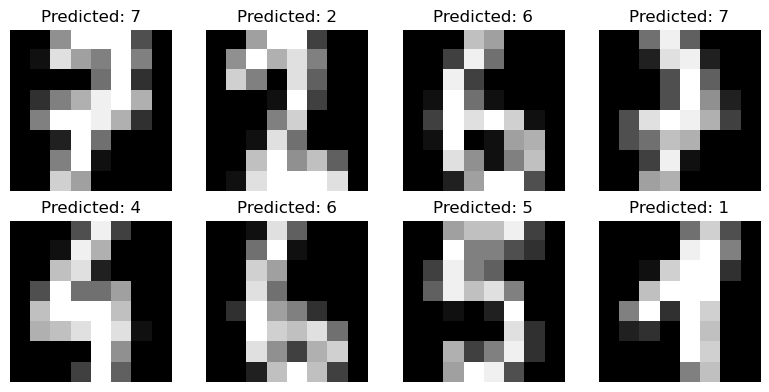

In [1]:
# Code for SVM classification of the MNIST dataset

# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
digits = datasets.load_digits()
X = digits.data / 16.0
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel and OvR strategy
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')

# Train the SVM model and predict the labels for the testing data
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Select 8 random samples from the testing set
random_indices = np.random.choice(len(X_test), size=8, replace=False)
X_samples = X_test[random_indices]
y_samples = y_pred[random_indices]

# Create a figure with 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(2*4, 2*2))

# Iterate through each subplot and plot the sample with the predicted label
for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Predicted: {y_samples[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()